## Speed, gender, and height of 1325 students

### Description
* 1,325 UCLA students were asked to fill out a survey where they were asked about their height, fastest speed they have ever driven, and gender.

### Format
* A data frame with 1325 observations on the following 3 variables.

### speed
* a numeric vector

### gender
* a factor with levels female and male

### height
* a numeric vector



https://www.openintro.org/data/index.php?data=speed_gender_height

In [1]:
import pyforest

In [2]:
df = pd.read_csv("speed_gender_height.csv")

<IPython.core.display.Javascript object>

In [3]:
df

,speed,gender,height
0,85.0,female,69.0
1,40.0,male,71.0
2,87.0,female,64.0
3,110.0,female,60.0
4,110.0,male,70.0
...,...,...,...
1320,97.0,female,63.0
1321,100.0,female,66.0
1322,90.0,female,63.0
1323,90.0,male,69.0


In [4]:
df.shape

(1325, 3)

# Data Exploration and Feature Engineering 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   1307 non-null   float64
 1   gender  1325 non-null   object 
 2   height  1320 non-null   float64
dtypes: float64(2), object(1)
memory usage: 31.2+ KB


In [6]:
df.isnull().any()
df.isnull().sum()

speed     18
gender     0
height     5
dtype: int64

In [7]:
df.dropna()

,speed,gender,height
0,85.0,female,69.0
1,40.0,male,71.0
2,87.0,female,64.0
3,110.0,female,60.0
4,110.0,male,70.0
...,...,...,...
1320,97.0,female,63.0
1321,100.0,female,66.0
1322,90.0,female,63.0
1323,90.0,male,69.0


In [8]:
df1 = df.dropna().copy()

In [9]:
df1

,speed,gender,height
0,85.0,female,69.0
1,40.0,male,71.0
2,87.0,female,64.0
3,110.0,female,60.0
4,110.0,male,70.0
...,...,...,...
1320,97.0,female,63.0
1321,100.0,female,66.0
1322,90.0,female,63.0
1323,90.0,male,69.0


In [10]:
df1.reset_index(drop = True, inplace=True)

In [11]:
df1

,speed,gender,height
0,85.0,female,69.0
1,40.0,male,71.0
2,87.0,female,64.0
3,110.0,female,60.0
4,110.0,male,70.0
...,...,...,...
1297,97.0,female,63.0
1298,100.0,female,66.0
1299,90.0,female,63.0
1300,90.0,male,69.0


In [12]:
df1.isnull().any()

speed     False
gender    False
height    False
dtype: bool

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,1302.0,90.751152,22.453939,0.0,80.0,90.0,100.0,185.0
height,1302.0,66.137174,4.049847,52.0,63.0,66.0,69.0,82.0


<IPython.core.display.Javascript object>

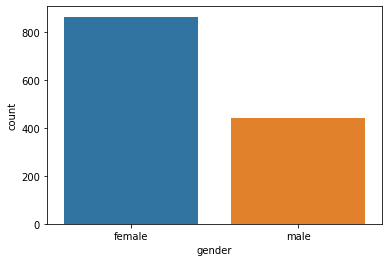

In [14]:
sns.countplot(x = df1.gender);

<IPython.core.display.Javascript object>

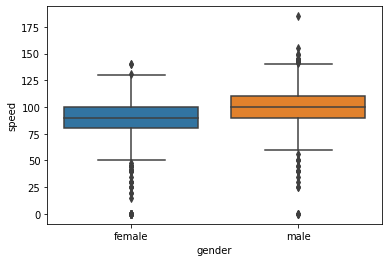

In [15]:
sns.boxplot(x = "gender", y= "speed", data = df1);

In [16]:
df1.groupby("gender").describe()

speed                                                       height  \
        count       mean        std  min   25%    50%    75%    max  count   
gender                                                                       
female  863.0  87.090382  21.462884  0.0  80.0   90.0  100.0  140.0  863.0   
male    439.0  97.947608  22.642335  0.0  90.0  100.0  110.0  185.0  439.0   

                                                           
             mean       std   min   25%   50%   75%   max  
gender                                                     
female  64.353882  2.991377  52.0  62.0  64.0  66.0  78.0  
male    69.642825  3.538760  52.0  68.0  70.0  72.0  82.0

In [109]:
def outlier_counter(df = df1, groupby= "gender", target="female",col = "speed", threshold= 1.5):
    
    "This function counts and returns outliers upper and lower respectively in terms of specific target label. Beside that it returns outliers indexes"
    
    Q3= df.groupby(groupby).describe().loc[target].loc[col].loc["75%"]
    Q1= df.groupby(groupby).describe().loc[target].loc[col].loc["25%"]
    IQR = (Q3 - Q1) *threshold
    
    upper_count = df.loc[((df[col] > (Q3+IQR)) & (df[groupby] == target)),].count()[0]
    lower_count = df.loc[((df[col] < (Q1-IQR)) & (df[groupby] == target)),].count()[0]
    upper_count_index = df.loc[((df[col] > (Q3+IQR)) & (df[groupby] == target)),].index
    lower_count_index = df.loc[((df[col] < (Q1-IQR)) & (df[groupby] == target)),].index
    
    return lower_count,upper_count,np.array(lower_count_index),np.array(upper_count_index)
    

In [110]:
df1.loc[((df1.speed < 50) & (df1.gender == "male")),].count()[0]

14

In [111]:
df1.loc[((df1.speed > 150) & (df1.gender == "male")),].count()[0]

2

In [112]:
outlier_counter(target="male",col = "speed", threshold= 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(14,
 2,
 array([   1,   19,   32,   72,  214,  253,  588,  589,  590,  862, 1012,
        1017, 1034, 1130], dtype=int64),
 array([204, 290], dtype=int64))

In [113]:
outlier_counter(target="female",col = "speed", threshold = 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(30,
 0,
 array([  44,   49,   73,  130,  148,  160,  222,  395,  398,  423,  474,
         499,  559,  574,  642,  649,  677,  727,  799,  816,  836,  929,
        1048, 1052, 1054, 1096, 1124, 1159, 1275, 1294], dtype=int64),
 array([], dtype=int64))

In [114]:
df1.loc[df1.loc[((df1.speed > 150) & (df1.gender == "male")),].index]

,speed,gender,height
204,185.0,male,75.0
290,155.0,male,70.0


In [115]:
outlier_counter(target="male",col = "speed", threshold = 2)[2:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([   1,   19,   32,   72,  214,  253,  588,  589,  590,  862, 1012,
        1017, 1034, 1130], dtype=int64),
 array([204, 290], dtype=int64))

In [116]:
a , b = outlier_counter(target="male",col = "speed", threshold= 2)[2:]
c = outlier_counter(target="female",col = "speed", threshold= 2)[2]

drop_indexes = np.concatenate((a,b,c))
print(f"These indexes are droped:\n {drop_indexes}")
df1.drop(index =drop_indexes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

These indexes are droped:
 [   1   19   32   72  214  253  588  589  590  862 1012 1017 1034 1130
  204  290   44   49   73  130  148  160  222  395  398  423  474  499
  559  574  642  649  677  727  799  816  836  929 1048 1052 1054 1096
 1124 1159 1275 1294]


,speed,gender,height
0,85.0,female,69.0
2,87.0,female,64.0
3,110.0,female,60.0
4,110.0,male,70.0
5,120.0,female,61.0
...,...,...,...
1297,97.0,female,63.0
1298,100.0,female,66.0
1299,90.0,female,63.0
1300,90.0,male,69.0


In [117]:
# df1.drop(index =drop_indexes, inplace=True)

<IPython.core.display.Javascript object>

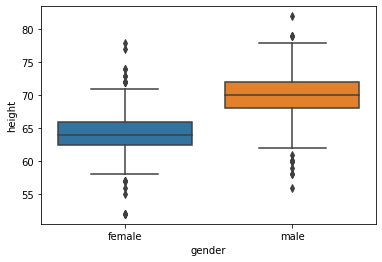

In [118]:
sns.boxplot(x = "gender", y= "height", data = df1);

<IPython.core.display.Javascript object>

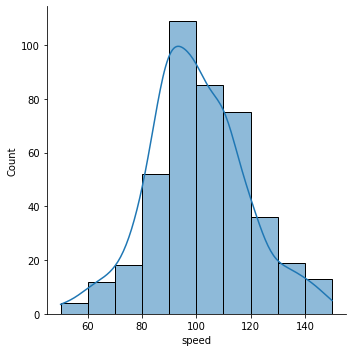

In [119]:
sns.displot(x = df1[df1.gender == "male"].speed, bins = 10, kde=True)

<IPython.core.display.Javascript object>

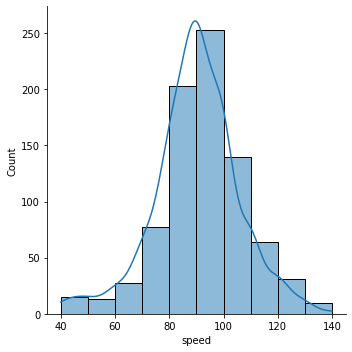

In [120]:
sns.displot(x = df1[df1.gender == "female"].speed, bins = 10, kde=True)

<IPython.core.display.Javascript object>

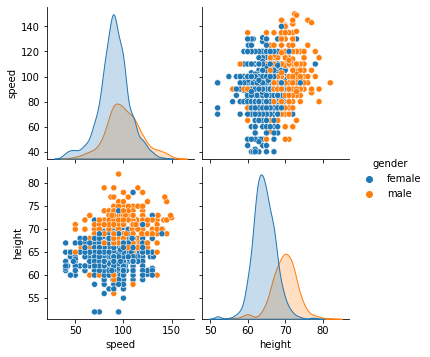

In [121]:
sns.pairplot(df1, hue='gender')

<IPython.core.display.Javascript object>

<AxesSubplot:>

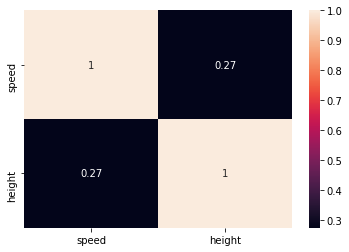

In [122]:
sns.heatmap(df1.corr(), annot=True)

# Scaling 

In [17]:
X = df1.drop("gender", axis = 1)
y = df1.gender

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=6)

<IPython.core.display.Javascript object>

In [19]:
from sklearn.preprocessing import RobustScaler
# Not: RobustScaler outliers lara karşı daha dirençli. Çünkü iqr değerlerine göre scale işlemi yapıyor.

In [20]:
scaler = RobustScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling 

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression(class_weight='balanced')

In [24]:
log_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [25]:
y_pred= log_model.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[78 13]
 [ 5 35]]
              precision    recall  f1-score   support

      female       0.94      0.86      0.90        91
        male       0.73      0.88      0.80        40

    accuracy                           0.86       131
   macro avg       0.83      0.87      0.85       131
weighted avg       0.88      0.86      0.87       131



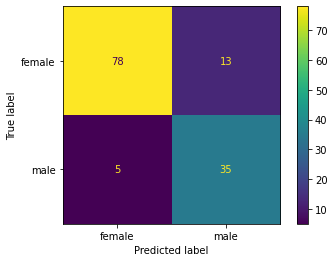

In [28]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=log_model.classes_).plot()

In [29]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

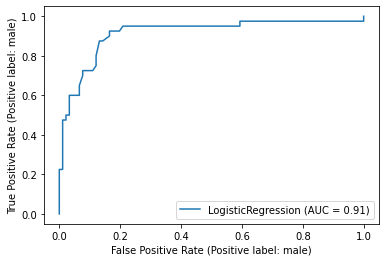

In [30]:
plot_roc_curve(log_model, X_test, y_test,pos_label="male")

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

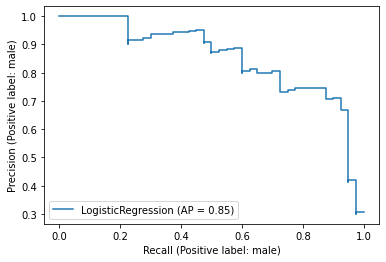

In [32]:
disp = plot_precision_recall_curve(log_model, X_test, y_test,pos_label="male")
# Eğer datamız unbalanced ise ROC/AUC curve nu değil precision_recall_curve nu hesaba katmalıyız.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

## XGBoost

In [33]:
X = df1.drop("gender", axis = 1)
y = df1.gender

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=6)

<IPython.core.display.Javascript object>

In [35]:
from xgboost import XGBClassifier

In [36]:
xgb_model = XGBClassifier()

In [37]:
xgb_model.fit(X_train,y_train)

[23:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
y_pred= xgb_model.predict(X_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[84  7]
 [12 28]]
              precision    recall  f1-score   support

      female       0.88      0.92      0.90        91
        male       0.80      0.70      0.75        40

    accuracy                           0.85       131
   macro avg       0.84      0.81      0.82       131
weighted avg       0.85      0.85      0.85       131



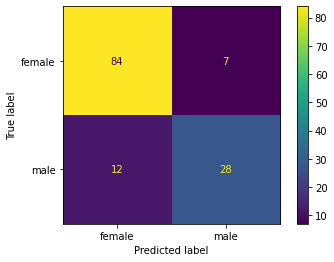

In [40]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=xgb_model.classes_).plot();

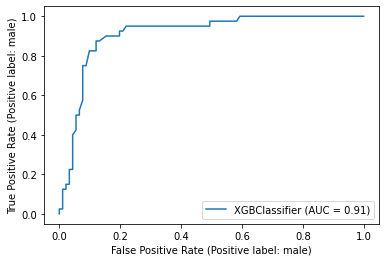

In [41]:
plot_roc_curve(xgb_model, X_test, y_test,pos_label="male")

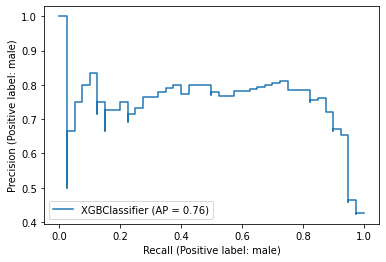

In [42]:
disp = plot_precision_recall_curve(xgb_model, X_test, y_test,pos_label="male")

## SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

### Oversampling 

In [44]:
oversample = SMOTE()

In [45]:
X_train.shape

(1171, 2)

In [46]:
X_train_ovs, y_train_ovs = oversample.fit_resample(X_train, y_train)

In [47]:
X_train_ovs.shape

(1544, 2)

In [48]:
xgb_model = XGBClassifier()

In [49]:
xgb_model.fit(X_train_ovs,y_train_ovs)

[23:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred= xgb_model.predict(X_test)

In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[79 12]
 [ 6 34]]
              precision    recall  f1-score   support

      female       0.93      0.87      0.90        91
        male       0.74      0.85      0.79        40

    accuracy                           0.86       131
   macro avg       0.83      0.86      0.84       131
weighted avg       0.87      0.86      0.87       131



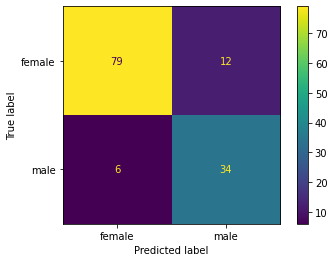

In [52]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=xgb_model.classes_).plot();

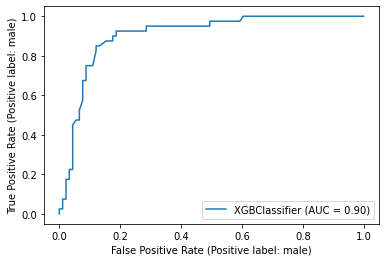

In [53]:
plot_roc_curve(xgb_model, X_test, y_test,pos_label="male")

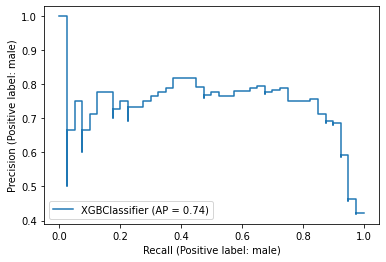

In [54]:
disp = plot_precision_recall_curve(xgb_model, X_test, y_test,pos_label="male")

### Both Over And Undersampling

In [93]:
over = SMOTE(sampling_strategy=.8)
under = RandomUnderSampler(sampling_strategy=1)

In [94]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [95]:
X_train.shape

(1171, 2)

In [96]:
X_train_ous, y_train_ous = pipeline.fit_resample(X_train, y_train)

In [97]:
X_train_ous.shape

(1234, 2)

In [98]:
xgb_model = XGBClassifier()

In [99]:
xgb_model.fit(X_train_ous,y_train_ous)

[23:33:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred= xgb_model.predict(X_test)

In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[82  9]
 [ 5 35]]
              precision    recall  f1-score   support

      female       0.94      0.90      0.92        91
        male       0.80      0.88      0.83        40

    accuracy                           0.89       131
   macro avg       0.87      0.89      0.88       131
weighted avg       0.90      0.89      0.89       131



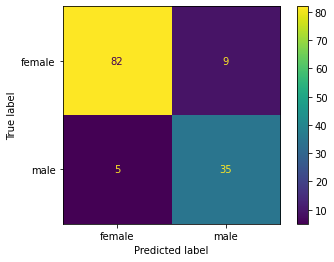

In [64]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=xgb_model.classes_).plot();

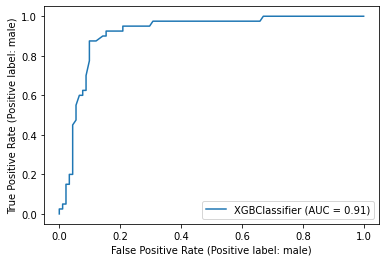

In [65]:
plot_roc_curve(xgb_model, X_test, y_test,pos_label="male")

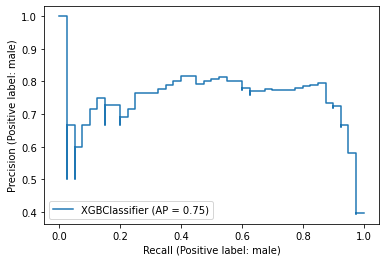

In [66]:
disp = plot_precision_recall_curve(xgb_model, X_test, y_test,pos_label="male")

### Cross Validate

### Prediction

In [67]:
data = {"speed" : 100, "height" : 68}

orion = pd.DataFrame(data =data,index =[0])
orion

<IPython.core.display.Javascript object>

,speed,height
0,100,68


In [68]:
print(xgb_model.predict(orion))
print(xgb_model.predict_proba(orion))

['male']
[[0.21469891 0.7853011 ]]


# TASK

1. Use GridSearchCV and find the best hyperparameters for XGBoost model
2. Which metrics are important and why? 
3. Use SMOTE and retrain models.
4. Make final decision about models and write down your conclusion.

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {"n_estimators":[100, 150, 168, 300],'max_depth':[3,4,5,6], "learning_rate": [0.01, 0.1, 0.2, 0.3],
             "subsample":[0.5, 0.7, 1], "colsample_bytree":[0.5, 0.7, 1]}

In [71]:
xgb_model = XGBClassifier()

In [72]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[23:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan 

In [73]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [75]:
y_pred = xgb_grid.predict(X_test)

In [76]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[87  4]
 [15 25]]
              precision    recall  f1-score   support

      female       0.85      0.96      0.90        91
        male       0.86      0.62      0.72        40

    accuracy                           0.85       131
   macro avg       0.86      0.79      0.81       131
weighted avg       0.86      0.85      0.85       131



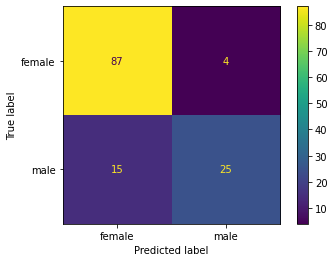

In [77]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=xgb_grid.classes_).plot();

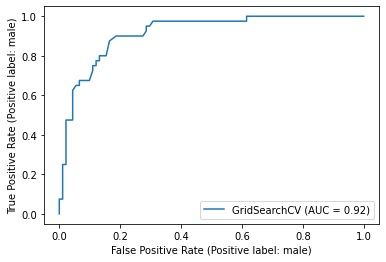

In [78]:
plot_roc_curve(xgb_grid, X_test, y_test,pos_label="male")

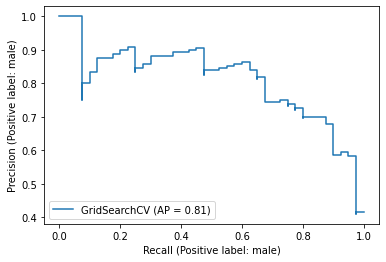

In [79]:
disp = plot_precision_recall_curve(xgb_grid, X_test, y_test,pos_label="male")

In [80]:
oversample = SMOTE()

In [81]:
X_train.shape

(1171, 2)

In [82]:
X_train_ovs, y_train_ovs = oversample.fit_resample(X_train, y_train)

In [83]:
X_train_ovs.shape

(1544, 2)

In [84]:
xgb_model = XGBClassifier()

In [85]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train_ovs, y_train_ovs)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[23:24:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan 

In [101]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [103]:
y_pred = xgb_grid.predict(X_test)

In [104]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[79 12]
 [ 8 32]]
              precision    recall  f1-score   support

      female       0.91      0.87      0.89        91
        male       0.73      0.80      0.76        40

    accuracy                           0.85       131
   macro avg       0.82      0.83      0.82       131
weighted avg       0.85      0.85      0.85       131



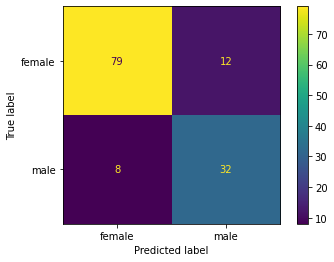

In [105]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=xgb_grid.classes_).plot();

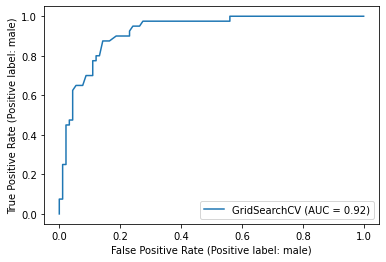

In [106]:
plot_roc_curve(xgb_grid, X_test, y_test,pos_label="male")

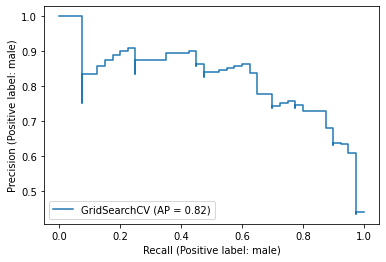

In [107]:
disp = plot_precision_recall_curve(xgb_grid, X_test, y_test,pos_label="male")